In [55]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
"""
for dataset in ['iwslt14', 'multi30k']:
    logs = pkl.load(open('data/{dataset}_logs.pkl'.format(dataset=dataset), 'rb'))

    num_datapoints = len(logs['sequences'])

    iterations = logs['normal_A'].keys()
    dicts = logs['sequences']
    for key in logs:
        if key == 'sequences':
            continue
        for iteration in iterations:
            for datapoint_idx in range(num_datapoints):
                dicts[datapoint_idx][(key, iteration, 'alpha')] = logs[key][iteration][datapoint_idx]['alpha']
                dicts[datapoint_idx][(key, iteration, 'beta')] = logs[key][iteration][datapoint_idx]['beta']
                dicts[datapoint_idx]['split'] = logs[key][iteration][datapoint_idx]['split']
    pkl.dump(dicts, open('data/{dataset}_logs_rz.pkl'.format(dataset=dataset), 'wb'))
    """
from utils import *

def max_acc_iter(name, metas):
    max_acc = -1.0
    max_acc_iter = None
    for key_ in metas:
        if key_[0] == name and 'test' in key_[2]:
            if metas[key_] > max_acc:
                max_acc = metas[key_]
                max_acc_iter = key_[1]
    return max_acc_iter

In [87]:
dataset = 'SMS'
dat = pkl.load(open('outputs/{dataset}_logs.pkl'.format(dataset=dataset), 'rb'))
all_dicts = dat['data']
subset = 'val'
dicts = [d for d in all_dicts if d['split'] == subset]
iterations = sorted(list(set([key[1] for key in dat['metas']])))

In [88]:
from utils import TopKMatch, TopPercentMatch, SpearmanRankCorr
metrics = [TopPercentMatch(p=5)]
normalA_iter = max_acc_iter('normal_A', dat['metas'])
normalB_iter = max_acc_iter('normal_B', dat['metas'])
uniform_iter = max_acc_iter('uniform', dat['metas'])

('normal_A', 1500, 'alpha') ('normal_B', 500, 'beta')
{'name': 'top 5% match', 'correlation': 0.09450337512054002, 'baseline': 0.09161041465766634}
('normal_A', 1500, 'alpha') ('normal_B', 1500, 'beta')
{'name': 'top 5% match', 'correlation': 0.0935390549662488, 'baseline': 0.09691417550626807}
('normal_A', 1500, 'alpha') ('normal_B', 3000, 'beta')
{'name': 'top 5% match', 'correlation': 0.09691417550626807, 'baseline': 0.08727097396335583}
('normal_A', 1500, 'alpha') ('normal_B', 3999, 'beta')
{'name': 'top 5% match', 'correlation': 0.09643201542912247, 'baseline': 0.08341369334619093}


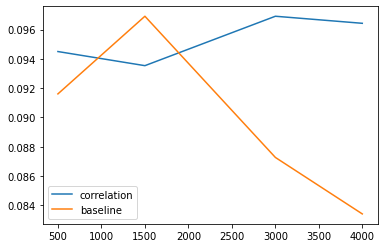

In [89]:
# metrics.append(SpearmanRankCorr()) comment out because this takes a lot of time to evaluate
x = []
y = []
baseline_y = []
for iter_ in iterations:
    key1, key2 = ('normal_A', normalA_iter, 'alpha'), ('normal_B', iter_, 'beta')
    print(key1, key2)
    for metric in metrics:
        corr = metric.eval_corr(dicts, key1, key2)
        print(corr)
    y.append(corr['correlation'])
    baseline_y.append(corr['baseline'])
    x.append(iter_)
plt.plot(x, y, label='correlation')
plt.plot(x, baseline_y, label='baseline')
plt.legend()
plt.show()

('normal_A', 1500, 'alpha') ('uniform', 500, 'beta')
{'name': 'top 5% match', 'correlation': 0.008678881388621022, 'baseline': 0.08003857280617165}
('normal_A', 1500, 'alpha') ('uniform', 1500, 'beta')
{'name': 'top 5% match', 'correlation': 0.015429122468659595, 'baseline': 0.08293153326904533}
('normal_A', 1500, 'alpha') ('uniform', 3000, 'beta')
{'name': 'top 5% match', 'correlation': 0.01446480231436837, 'baseline': 0.08196721311475409}
('normal_A', 1500, 'alpha') ('uniform', 3999, 'beta')
{'name': 'top 5% match', 'correlation': 0.016875602700096432, 'baseline': 0.09498553519768563}


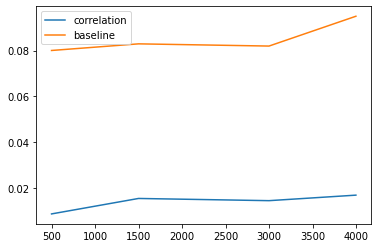

[500, 1500, 3000, 3999]
[0.008678881388621022, 0.015429122468659595, 0.01446480231436837, 0.016875602700096432]


In [90]:

x = []
y = []
baseline_y = []
for iter_ in iterations:
    key1, key2 = ('normal_A', normalA_iter, 'alpha'), ('uniform', iter_, 'beta')
    print(key1, key2)
    for metric in metrics:
        corr = metric.eval_corr(dicts, key1, key2)
        print(corr)
    y.append(corr['correlation'])
    baseline_y.append(corr['baseline'])
    x.append(iter_)
plt.plot(x, y, label='correlation')
plt.plot(x, baseline_y, label='baseline')
plt.legend()
plt.show()
print(x)
print(y)

('uniform', 500, 'beta') logistics_beta
{'name': 'top 5% match', 'correlation': 0.3254580520732883, 'baseline': 0.10752169720347156}
('uniform', 1500, 'beta') logistics_beta
{'name': 'top 5% match', 'correlation': 0.24686595949855353, 'baseline': 0.11427193828351012}
('uniform', 3000, 'beta') logistics_beta
{'name': 'top 5% match', 'correlation': 0.2415621986499518, 'baseline': 0.10655737704918032}
('uniform', 3999, 'beta') logistics_beta
{'name': 'top 5% match', 'correlation': 0.23336547733847637, 'baseline': 0.11523625843780134}


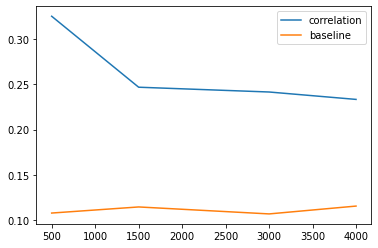

In [91]:
x = []
y = []
baseline_y = []
for iter_ in iterations:
    key1, key2 = ('uniform', iter_, 'beta'), 'logistics_beta'
    print(key1, key2)
    for metric in metrics:
        corr = metric.eval_corr(dicts, key1, key2)
        print(corr)
    y.append(corr['correlation'])
    baseline_y.append(corr['baseline'])
    x.append(iter_)
plt.plot(x, y, label='correlation')
plt.plot(x, baseline_y, label='baseline')
plt.legend()
plt.show()